In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
data_filepath = '../data/original/'
density_reports_filepath = data_filepath + 'DensityReports.xlsx'
historical_incidents_filepath = data_filepath + 'HistoricalIncidents.xlsx'
product_attributes_filepath = data_filepath + 'ProductAttributes.xlsx'
supplier_scorecard_filepath = data_filepath + 'SupplierScorecard.xlsx'

# Load Data

In [4]:
density_reports = pd.read_excel(density_reports_filepath)
product_attributes = pd.read_excel(product_attributes_filepath)
supplier_scorecard = pd.read_excel(supplier_scorecard_filepath)

# Conformity

### Packaging Quality

In [5]:
density_reports['PackagingQuality'].value_counts()

PackagingQuality
Good         397338
Bad           97017
GOOD           1914
bad            1868
Uncertain      1863
Name: count, dtype: int64

In [6]:
unique_packaging_quality = density_reports['PackagingQuality'].unique()
print(unique_packaging_quality)

density_reports['PackagingQuality'] = density_reports['PackagingQuality'].str.upper()
unique_packaging_quality = density_reports['PackagingQuality'].unique()

unique_packaging_quality = density_reports['PackagingQuality'].unique()
print(unique_packaging_quality)

['Good' 'Bad' 'GOOD' 'Uncertain' 'bad']
['GOOD' 'BAD' 'UNCERTAIN']


In [7]:
density_reports['PackagingQuality'].value_counts()

PackagingQuality
GOOD         399252
BAD           98885
UNCERTAIN      1863
Name: count, dtype: int64

### Supplier Name

In [8]:
density_reports['SupplierName'].value_counts()

SupplierName
SupplierA    138607
SupplierB    110723
SupplierC     74490
SupplierD     53416
SupplierE     40662
SupplierF     32845
SupplierG     25510
SupplierH     13744
supplierA      1721
SupllierC      1714
supplierh      1674
SPLF           1642
SuplA          1629
SuppB          1623
Name: count, dtype: int64

In [9]:
unique_supplier = density_reports['SupplierName'].unique()
print(unique_supplier)

# Define the mappings
supplier_mappings = {
    'SupplierA': 'SupplierA',
    'supplierA': 'SupplierA',
    'SuplA': 'SupplierA',
    'SupplierB': 'SupplierB',
    'SuppB': 'SupplierB',
    'SupplierC': 'SupplierC',
    'SupllierC': 'SupplierC',
    'SupplierD': 'SupplierD',
    'SupplierE': 'SupplierE',
    'SupplierF': 'SupplierF',
    'SPLF': 'SupplierF',
    'SupplierG': 'SupplierG',
    'supplierh': 'SupplierH',
    'SupplierH': 'SupplierH'
}
# Apply the mapping to standardize SupplierName
density_reports['SupplierName'] = density_reports['SupplierName'].map(supplier_mappings).fillna(density_reports['SupplierName'])

unique_supplier = density_reports['SupplierName'].unique()
print(unique_supplier)

['SupplierA' 'SupplierC' 'SupplierD' 'SupplierB' 'supplierA' 'SupplierF'
 'SupplierE' 'supplierh' 'SupplierH' 'SuppB' 'SupplierG' 'SupllierC'
 'SPLF' 'SuplA']
['SupplierA' 'SupplierC' 'SupplierD' 'SupplierB' 'SupplierF' 'SupplierE'
 'SupplierH' 'SupplierG']


In [10]:
density_reports['SupplierName'].value_counts()

SupplierName
SupplierA    141957
SupplierB    112346
SupplierC     76204
SupplierD     53416
SupplierE     40662
SupplierF     34487
SupplierG     25510
SupplierH     15418
Name: count, dtype: int64

### Proposed Folding Method

In [11]:
density_reports['ProposedFoldingMethod'].value_counts()

ProposedFoldingMethod
Method2     218201
Method1     157652
Method3     114363
Methd1        2450
FoldX         2426
Method_2      2394
Name: count, dtype: int64

In [12]:
unique_fold_method = density_reports['ProposedFoldingMethod'].unique()
print(unique_fold_method)

# Define the mappings
fold_method_mappings = {
    'Method1': 'Method1',
    'Methd1': 'Method1',
    'Method2': 'Method2',
    'Method_2': 'Method2',
    'Method3': 'Method3',
    'FoldX': 'MethodX'
}
# Apply the mapping to standardize SupplierName
density_reports['ProposedFoldingMethod'] = density_reports['ProposedFoldingMethod'].map(fold_method_mappings).fillna(density_reports['ProposedFoldingMethod'])

# Drop rows with NaN values in 'ProposedFoldingMethod'
density_reports = density_reports.dropna(subset=['ProposedFoldingMethod'])

unique_fold_method = density_reports['ProposedFoldingMethod'].unique()
print(unique_fold_method)

['Method2' 'Method1' 'Method3' 'Method_2' nan 'Methd1' 'FoldX']
['Method2' 'Method1' 'Method3' 'MethodX']


In [13]:
density_reports['ProposedFoldingMethod'].value_counts()

ProposedFoldingMethod
Method2    220595
Method1    160102
Method3    114363
MethodX      2426
Name: count, dtype: int64

### Proposed Layout

In [14]:
density_reports['ProposedLayout'].value_counts()

ProposedLayout
LayoutB    179446
LayoutC    138517
LayoutA     83629
LayoutD     64326
LayoutE     21318
LayC         2651
Box9         2564
LayoutX      2537
layouta      2498
Name: count, dtype: int64

In [15]:
unique_layout = density_reports['ProposedLayout'].unique()
print(unique_layout)

# Define the mappings
layout_mappings = {
    'LayoutA': 'LayoutA',
    'layouta': 'LayoutA',
    'LayoutB': 'LayoutB',
    'LayoutC': 'LayoutC',
    'LayC': 'LayoutC',
    'LayoutD': 'LayoutD',
    'LayoutE': 'LayoutE',
    'LayoutX': 'LayoutX',
    'Box9': 'LayoutX',
}
# Apply the mapping to standardize SupplierName
density_reports['ProposedLayout'] = density_reports['ProposedLayout'].map(layout_mappings).fillna(density_reports['ProposedLayout'])

# Drop rows with NaN values in 'ProposedLayout'
density_reports = density_reports.dropna(subset=['ProposedLayout'])

unique_layout = density_reports['ProposedLayout'].unique()
print(unique_layout)

['LayoutC' 'LayoutB' 'LayoutA' 'LayoutD' 'LayoutE' 'LayoutX' 'Box9'
 'layouta' 'LayC']
['LayoutC' 'LayoutB' 'LayoutA' 'LayoutD' 'LayoutE' 'LayoutX']


In [16]:
density_reports['ProposedLayout'].value_counts()

ProposedLayout
LayoutB    179446
LayoutC    141168
LayoutA     86127
LayoutD     64326
LayoutE     21318
LayoutX      5101
Name: count, dtype: int64

### Garment Type

In [17]:
unique_garment_type = density_reports['GarmentType'].unique()
print(unique_garment_type)

['Pants' 'T-Shirt' 'Shirt' 'Coat' 'Dress' 'Blouse' 'Suit' 'Hoodie' 'Skirt'
 'Jacket' 'Shorts' 'Sweater']


### Material

In [18]:
unique_material = density_reports['Material'].unique()
print(unique_material)

['Polyester' 'Denim' 'Cotton' 'Linen' 'Wool' 'Silk']


### Size

In [19]:
unique_size = product_attributes['Size'].unique()
print(unique_size)

['L' 'S' 'M' 'XL' 'XS']


### Collection

In [20]:
unique_collection = product_attributes['Collection'].unique()
print(unique_collection)

['Summer' 'Spring' 'Winter' 'Autumn']


In [21]:
report_product_attributes = pd.merge(
    density_reports[["ProductReference", "SupplierName", "GarmentType", "Material", 
                     "Weight", "ProposedUnitsPerCarton", "ProposedFoldingMethod", 
                     "ProposedLayout", "PackagingQuality", "DateOfReport"
                     ]], 
    product_attributes[['ProductReference', 'Size', 'Collection']], 
    on="ProductReference", 
    how='inner'
    )

In [22]:
report_product_attributes['Month'] = report_product_attributes['DateOfReport'].dt.to_period('M')

# Distributions relative to Packaging Quality

In [23]:
color_map_base = {
    "BAD": "#d62728",          # Red
    "GOOD": "#27d65bff",      # Green
    "UNCERTAIN": "#f1ed20ff"  # Yellow
}

color_map_mod = {
    "BAD": "#d62728",          # Red, opaque
    "GOOD": "#27d65b11",      # Green, transparent
    "UNCERTAIN": "#f1ed2009"  # Yellow, transparent
}

### Suppliers

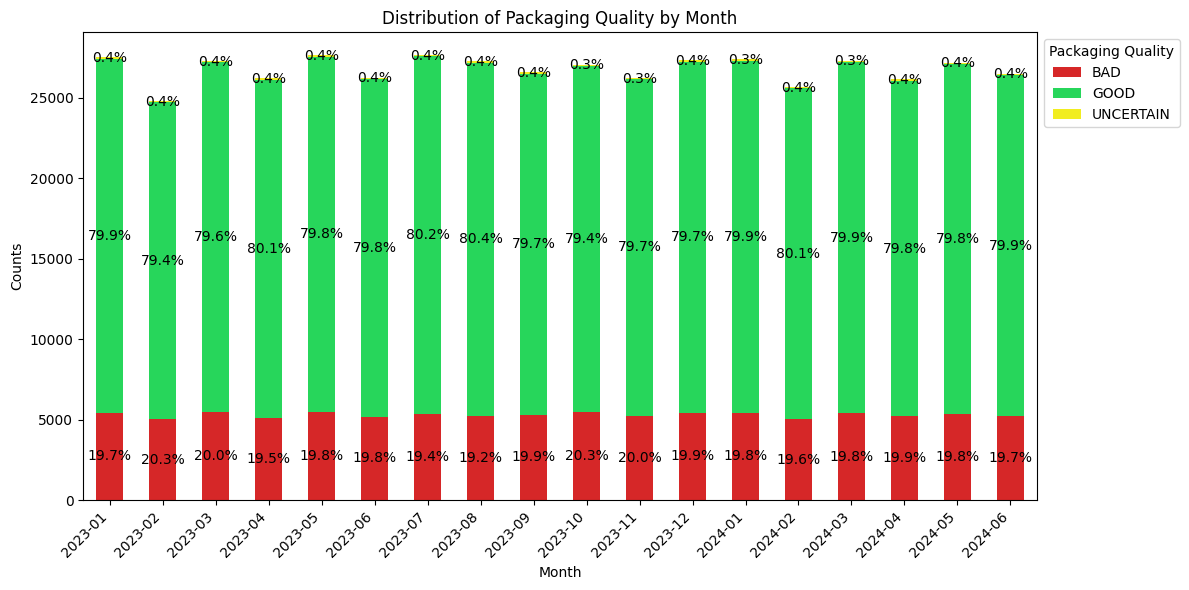

In [24]:
# Group by Month and Packaging Quality, then calculate counts
packaging_quality_by_month = report_product_attributes.groupby(['Month', 'PackagingQuality']).size().unstack(fill_value=0)

# Plot the distribution
ax = packaging_quality_by_month.plot(
    kind='bar', stacked=True, figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in packaging_quality_by_month.columns]
    )
plt.title('Distribution of Packaging Quality by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, month in enumerate(packaging_quality_by_month.index):
    total = packaging_quality_by_month.loc[month].sum()
    bottom = 0
    for quality in packaging_quality_by_month.columns:
        value = packaging_quality_by_month.loc[month, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

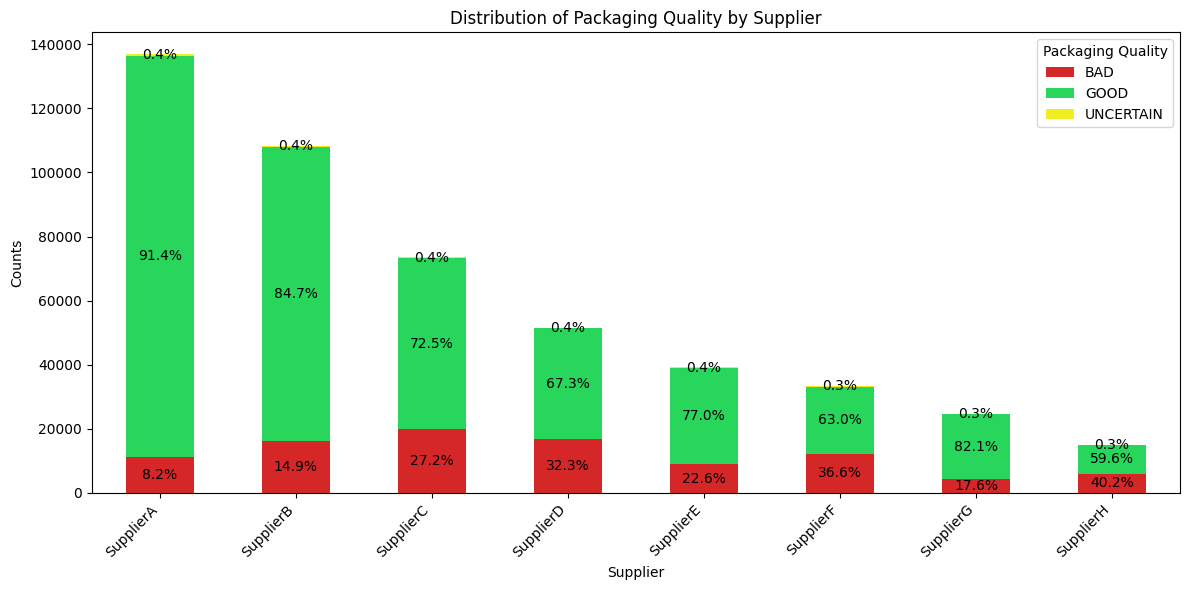

In [25]:
# Group by Supplier and Packaging Quality, then calculate counts
packaging_quality_by_supplier = report_product_attributes.groupby(['SupplierName', 'PackagingQuality']).size().unstack(fill_value=0)

# Plot the distribution
ax = packaging_quality_by_supplier.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in packaging_quality_by_supplier.columns])
plt.title('Distribution of Packaging Quality by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, supplier in enumerate(packaging_quality_by_supplier.index):
    total = packaging_quality_by_supplier.loc[supplier].sum()
    bottom = 0
    for quality in packaging_quality_by_supplier.columns:
        value = packaging_quality_by_supplier.loc[supplier, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

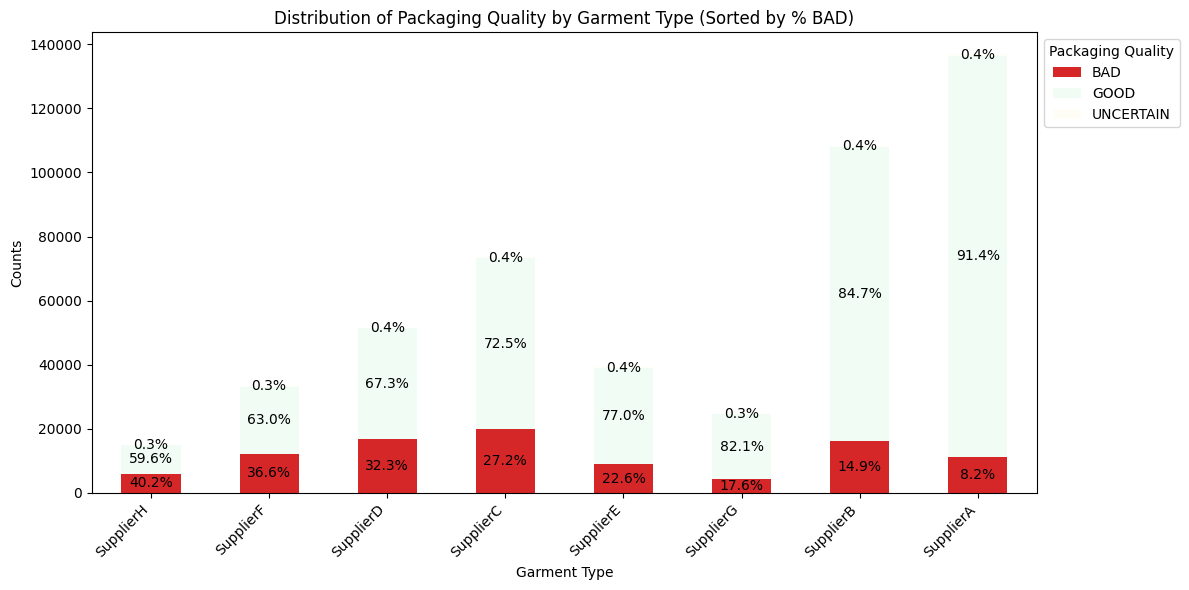

In [26]:
# Sort garment types by percentage of "BAD" in descending order
bad_percent = packaging_quality_by_supplier.apply(
    lambda row: row["BAD"] / row.sum() if row.sum() > 0 else 0, axis=1
)
sorted_by_bad_percent = packaging_quality_by_supplier.loc[bad_percent.sort_values(ascending=False).index]

# Plot the sorted distribution
ax = sorted_by_bad_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_mod.get(col, None) for col in sorted_by_bad_percent.columns]
)
plt.title('Distribution of Packaging Quality by Garment Type (Sorted by % BAD)')
plt.xlabel('Garment Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, garment_type in enumerate(sorted_by_bad_percent.index):
    total = sorted_by_bad_percent.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_by_bad_percent.columns:
        value = sorted_by_bad_percent.loc[garment_type, quality]
        percentage = (value / total) * 100 if total > 0 else 0
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

### Garment Types

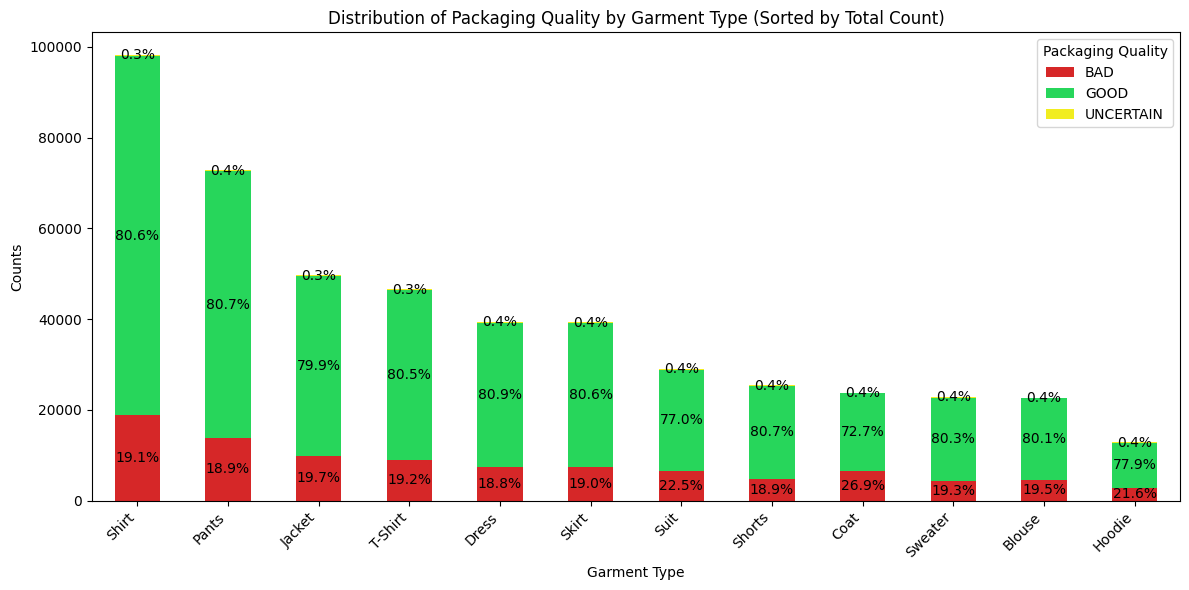

In [27]:
# Sort garment types by total count of records (sum across all packaging qualities) in descending order
packaging_quality_by_garment_type = report_product_attributes.groupby(['GarmentType', 'PackagingQuality']).size().unstack(fill_value=0)
sorted_garment_types_index = packaging_quality_by_garment_type.sum(axis=1).sort_values(ascending=False).index
sorted_packaging_quality_by_garment_type = packaging_quality_by_garment_type.loc[sorted_garment_types_index]

# Plot the sorted distribution
ax = sorted_packaging_quality_by_garment_type.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in sorted_packaging_quality_by_garment_type.columns]
)
plt.title('Distribution of Packaging Quality by Garment Type (Sorted by Total Count)')
plt.xlabel('Garment Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, garment_type in enumerate(sorted_packaging_quality_by_garment_type.index):
    total = sorted_packaging_quality_by_garment_type.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_packaging_quality_by_garment_type.columns:
        value = sorted_packaging_quality_by_garment_type.loc[garment_type, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

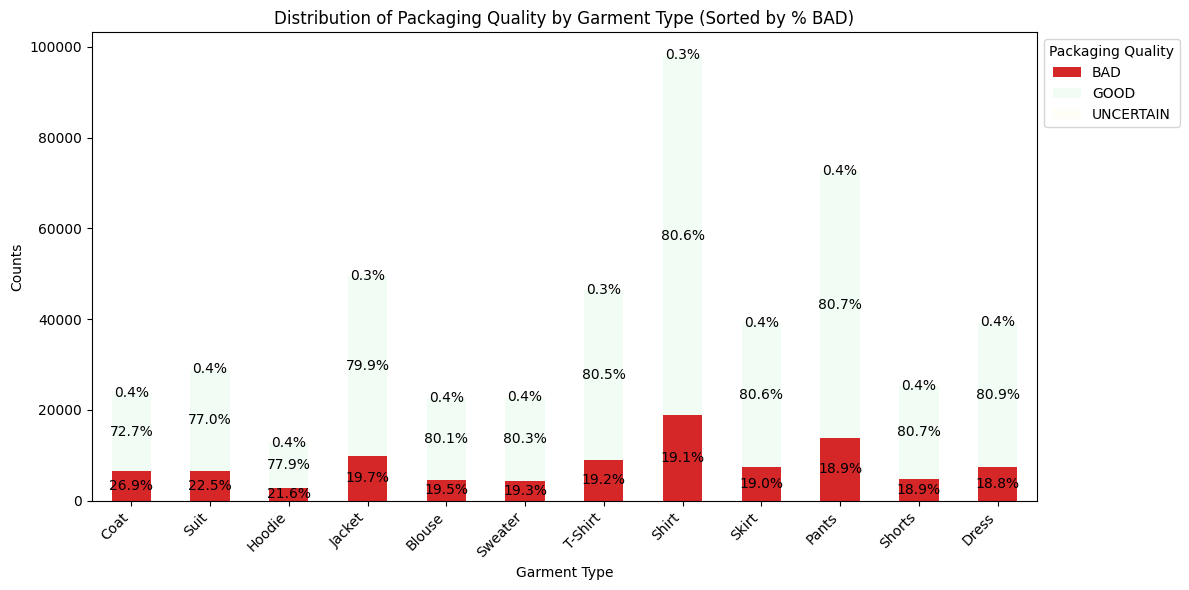

In [28]:
bad_percent = packaging_quality_by_garment_type.apply(
    lambda row: row["BAD"] / row.sum() if row.sum() > 0 else 0, axis=1
)
# Sort garment types by percentage of "BAD" in descending order
sorted_by_bad_percent = packaging_quality_by_garment_type.loc[bad_percent.sort_values(ascending=False).index]

# Plot the sorted distribution
ax = sorted_by_bad_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_mod.get(col, None) for col in sorted_by_bad_percent.columns]
)
plt.title('Distribution of Packaging Quality by Garment Type (Sorted by % BAD)')
plt.xlabel('Garment Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels
for i, garment_type in enumerate(sorted_by_bad_percent.index):
    total = sorted_by_bad_percent.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_by_bad_percent.columns:
        value = sorted_by_bad_percent.loc[garment_type, quality]
        percentage = (value / total) * 100 if total > 0 else 0
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

### Material

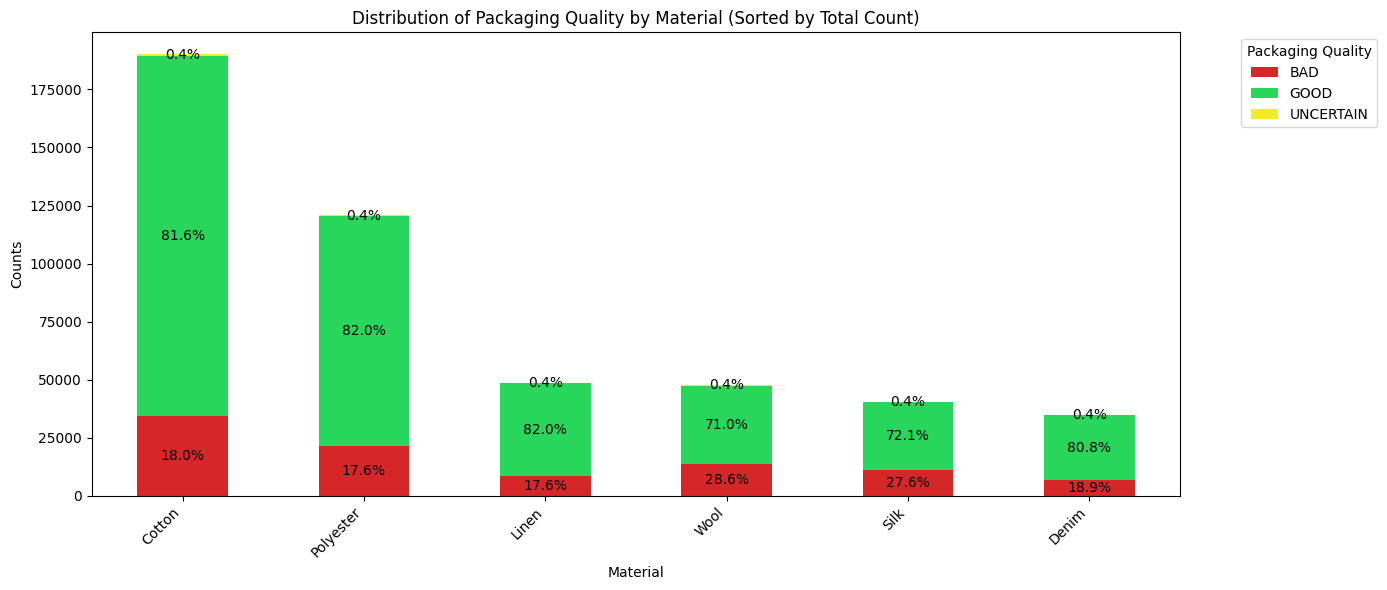

In [29]:
# Sort material by total count of records (sum across all packaging qualities) in descending order
packaging_quality_by_material = report_product_attributes.groupby(['Material', 'PackagingQuality']).size().unstack(fill_value=0)
sorted_material_index = packaging_quality_by_material.sum(axis=1).sort_values(ascending=False).index
sorted_packaging_quality_by_material = packaging_quality_by_material.loc[sorted_material_index]

# Plot the sorted distribution
ax = sorted_packaging_quality_by_material.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in sorted_packaging_quality_by_material.columns]
)
plt.title('Distribution of Packaging Quality by Material (Sorted by Total Count)')
plt.xlabel('Material')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move legend outside the plot box
plt.legend(title='Packaging Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels
for i, garment_type in enumerate(sorted_packaging_quality_by_material.index):
    total = sorted_packaging_quality_by_material.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_packaging_quality_by_material.columns:
        value = sorted_packaging_quality_by_material.loc[garment_type, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

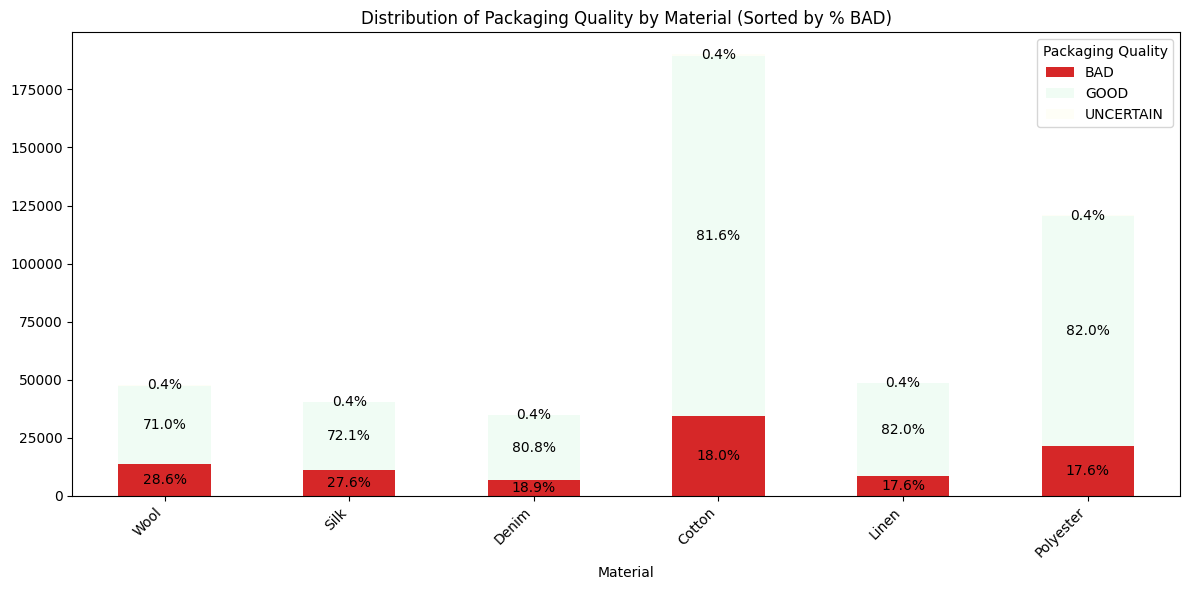

In [30]:
# Sort materials by percentage of "BAD" packaging quality records in descending order
bad_percent_material = packaging_quality_by_material.apply(
    lambda row: row["BAD"] / row.sum() if row.sum() > 0 else 0, axis=1
)
sorted_by_bad_percent_material = packaging_quality_by_material.loc[bad_percent_material.sort_values(ascending=False).index]

ax = sorted_by_bad_percent_material.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_mod.get(col, None) for col in sorted_by_bad_percent_material.columns]
)
plt.title('Distribution of Packaging Quality by Material (Sorted by % BAD)')
plt.xlabel('Material')
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, material in enumerate(sorted_by_bad_percent_material.index):
    total = sorted_by_bad_percent_material.loc[material].sum()
    bottom = 0
    for quality in sorted_by_bad_percent_material.columns:
        value = sorted_by_bad_percent_material.loc[material, quality]
        percentage = (value / total) * 100 if total > 0 else 0
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

### Size

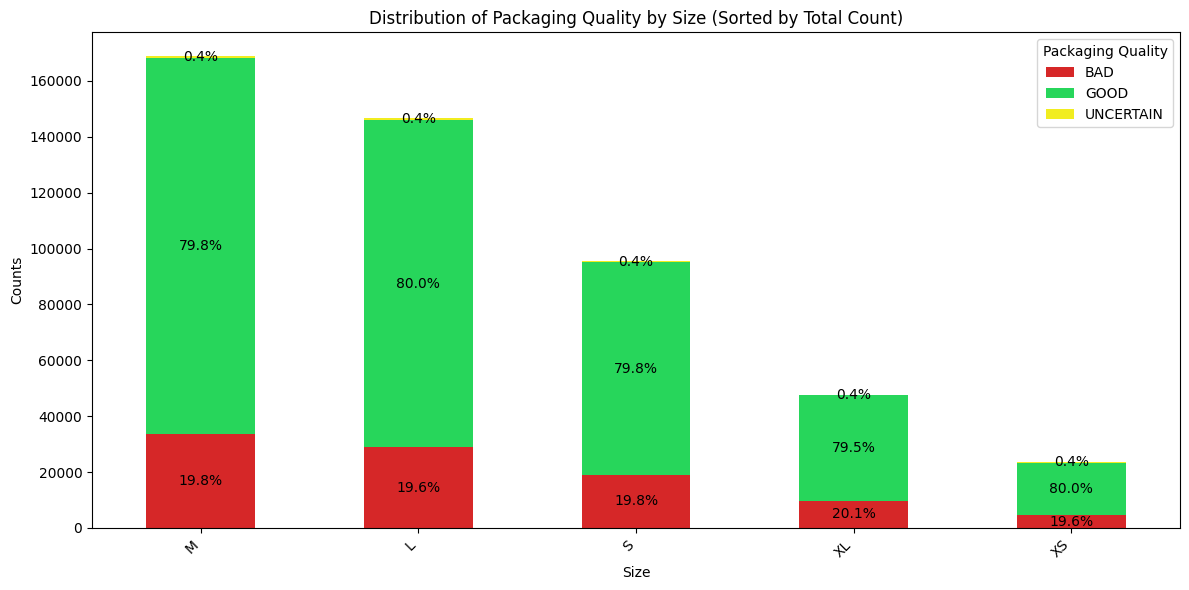

In [42]:
# Sort size by total count of records (sum across all packaging qualities) in descending order
packaging_quality_by_size = report_product_attributes.groupby(['Size', 'PackagingQuality']).size().unstack(fill_value=0)
sorted_size_index = packaging_quality_by_size.sum(axis=1).sort_values(ascending=False).index
sorted_packaging_quality_by_size = packaging_quality_by_size.loc[sorted_size_index]

# Plot the sorted distribution
ax = sorted_packaging_quality_by_size.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in sorted_packaging_quality_by_size.columns]
)
plt.title('Distribution of Packaging Quality by Size (Sorted by Total Count)')
plt.xlabel('Size')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, garment_type in enumerate(sorted_packaging_quality_by_size.index):
    total = sorted_packaging_quality_by_size.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_packaging_quality_by_size.columns:
        value = sorted_packaging_quality_by_size.loc[garment_type, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

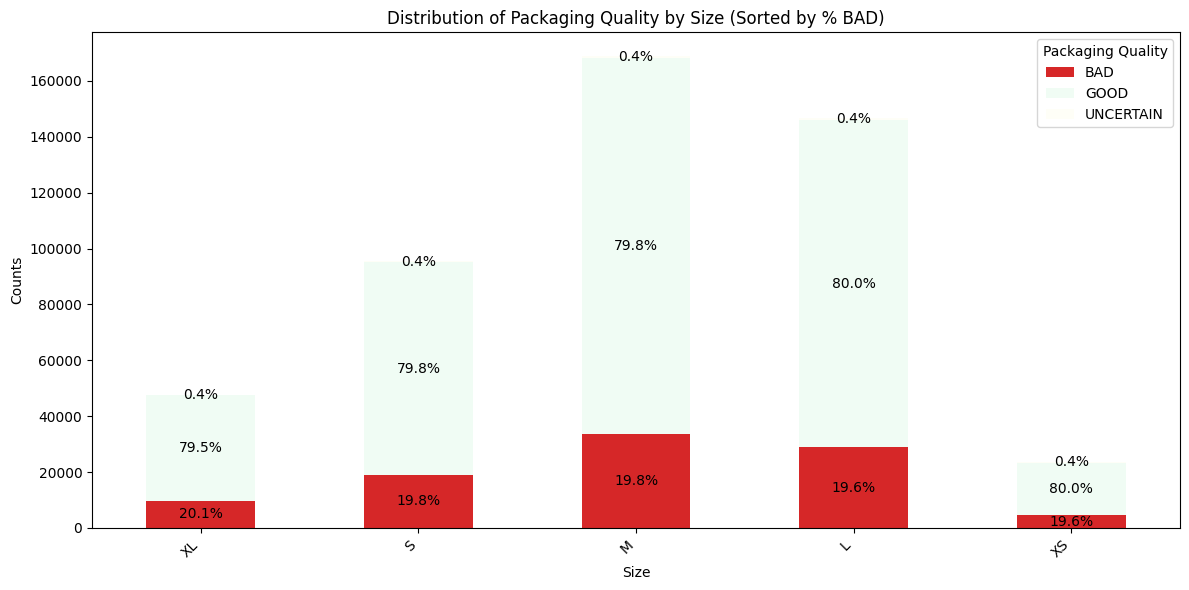

In [43]:
# Sort sizes by percentage of "BAD" packaging quality records in descending order
bad_percent_size = packaging_quality_by_size.apply(
    lambda row: row["BAD"] / row.sum() if row.sum() > 0 else 0, axis=1
)
sorted_by_bad_percent_size = packaging_quality_by_size.loc[bad_percent_size.sort_values(ascending=False).index]

ax = sorted_by_bad_percent_size.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_mod.get(col, None) for col in sorted_by_bad_percent_size.columns]
)
plt.title('Distribution of Packaging Quality by Size (Sorted by % BAD)')
plt.xlabel('Size')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, size in enumerate(sorted_by_bad_percent_size.index):
    total = sorted_by_bad_percent_size.loc[size].sum()
    bottom = 0
    for quality in sorted_by_bad_percent_size.columns:
        value = sorted_by_bad_percent_size.loc[size, quality]
        percentage = (value / total) * 100 if total > 0 else 0
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

### Collection

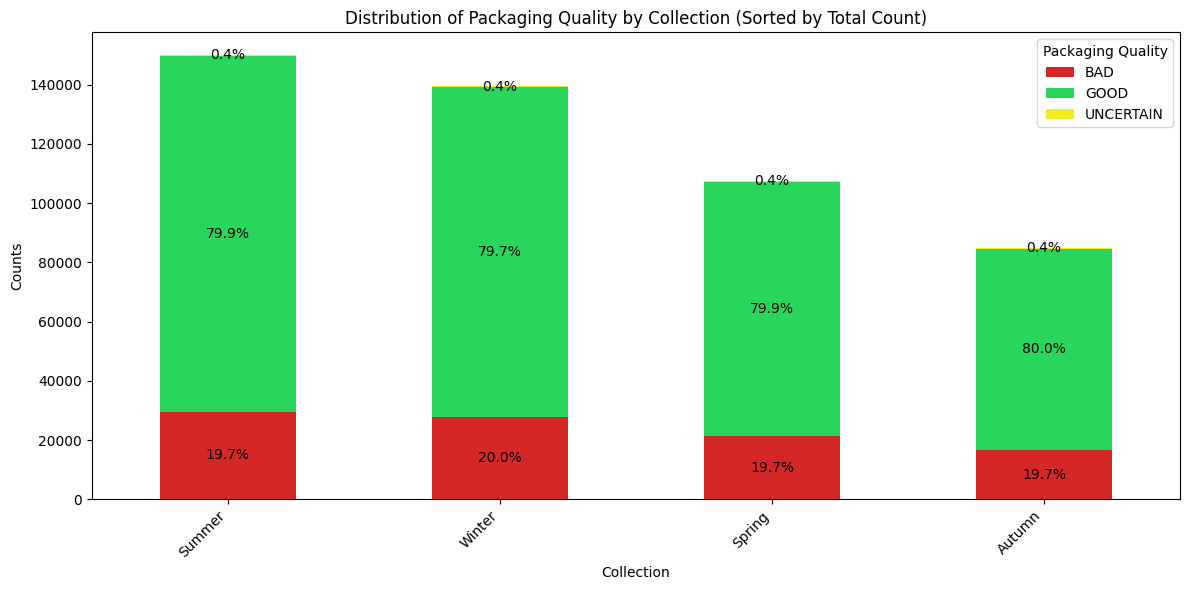

In [44]:
# Sort collection by total count of records (sum across all packaging qualities) in descending order
packaging_quality_by_collection = report_product_attributes.groupby(['Collection', 'PackagingQuality']).size().unstack(fill_value=0)
sorted_collection_index = packaging_quality_by_collection.sum(axis=1).sort_values(ascending=False).index
sorted_packaging_quality_by_collection = packaging_quality_by_collection.loc[sorted_collection_index]

# Plot the sorted distribution
ax = sorted_packaging_quality_by_collection.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_base.get(col, None) for col in sorted_packaging_quality_by_collection.columns]
)
plt.title('Distribution of Packaging Quality by Collection (Sorted by Total Count)')
plt.xlabel('Collection')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, garment_type in enumerate(sorted_packaging_quality_by_collection.index):
    total = sorted_packaging_quality_by_collection.loc[garment_type].sum()
    bottom = 0
    for quality in sorted_packaging_quality_by_collection.columns:
        value = sorted_packaging_quality_by_collection.loc[garment_type, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

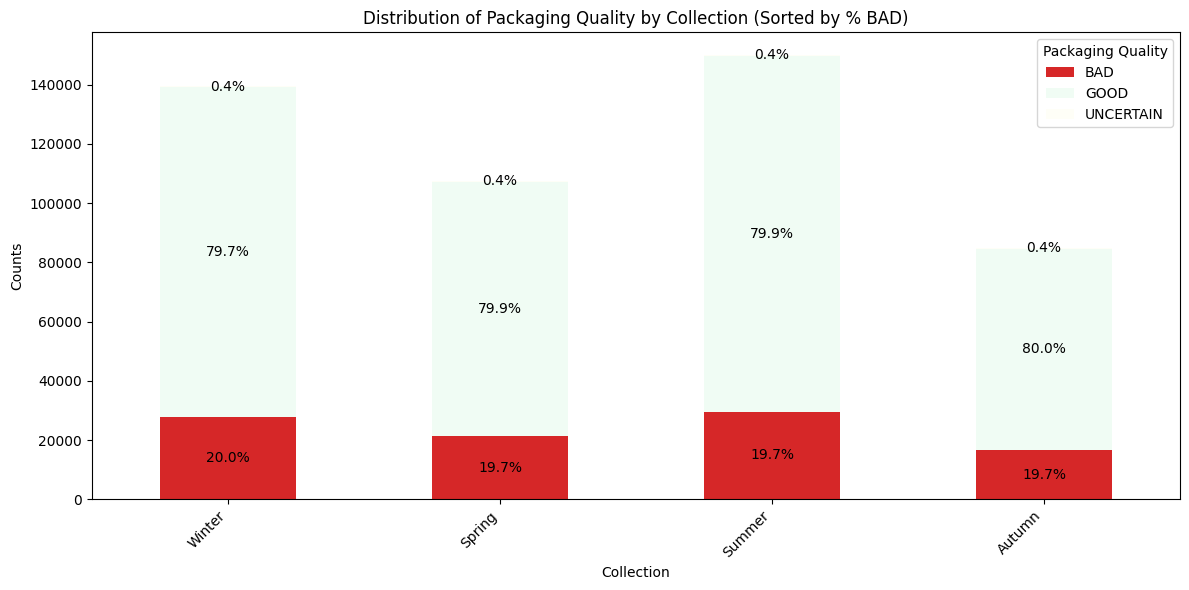

In [45]:
# Sort sizes by percentage of "BAD" packaging quality records in descending order
bad_percent_size = packaging_quality_by_collection.apply(
    lambda row: row["BAD"] / row.sum() if row.sum() > 0 else 0, axis=1
)
sorted_by_bad_percent_collection = packaging_quality_by_collection.loc[bad_percent_size.sort_values(ascending=False).index]

ax = sorted_by_bad_percent_collection.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=[color_map_mod.get(col, None) for col in sorted_by_bad_percent_collection.columns]
)
plt.title('Distribution of Packaging Quality by Collection (Sorted by % BAD)')
plt.xlabel('Collection')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, size in enumerate(sorted_by_bad_percent_collection.index):
    total = sorted_by_bad_percent_collection.loc[size].sum()
    bottom = 0
    for quality in sorted_by_bad_percent_collection.columns:
        value = sorted_by_bad_percent_collection.loc[size, quality]
        percentage = (value / total) * 100 if total > 0 else 0
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

# Association

In [47]:
df = report_product_attributes.copy()

In [48]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

In [52]:
categorical_columns = ['SupplierName', 'GarmentType', 
                       'Material', 'ProposedFoldingMethod', 
                       'ProposedLayout', 'Size', 'Collection', 'PackagingQuality']
results = []

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        v = cramers_v(df[col1], df[col2])
        results.append({'Feature1': col1, 'Feature2': col2, "CramersV": v})

cramers_v_df = pd.DataFrame(results).sort_values(by='CramersV', ascending=False)
cramers_v_df

,Feature1,Feature2,CramersV
13,Material,ProposedFoldingMethod,0.564221
9,GarmentType,ProposedLayout,0.461266
6,SupplierName,PackagingQuality,0.179046
14,Material,ProposedLayout,0.085167
17,Material,PackagingQuality,0.070436
21,ProposedFoldingMethod,PackagingQuality,0.058783
12,GarmentType,PackagingQuality,0.033511
24,ProposedLayout,PackagingQuality,0.033355
10,GarmentType,Size,0.028900
16,Material,Collection,0.028399


# Mutual Information

In [60]:
df = report_product_attributes.copy()

# Separate features and target, remove unnecessary columns
X = df.drop(columns=['PackagingQuality', 'ProductReference', 'DateOfReport', 'Month'])
y = df['PackagingQuality']

In [61]:
# Label encode all categorical variables (both features and target)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_encoded = X.copy()
discrete_features = []

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
        discrete_features.append(True)
    else:
        discrete_features.append(False)  # float columns

# Compute mutual information
mi_scores = mutual_info_classif(X_encoded, y_encoded, discrete_features=discrete_features)

# Present results
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MutualInformation': mi_scores
}).sort_values(by='MutualInformation', ascending=False)

print(mi_df)

                  Feature  MutualInformation
0            SupplierName           0.032370
2                Material           0.004636
5   ProposedFoldingMethod           0.003300
3                  Weight           0.002270
4  ProposedUnitsPerCarton           0.001548
1             GarmentType           0.001059
6          ProposedLayout           0.001041
7                    Size           0.000010
8              Collection           0.000004
